11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2709 - accuracy: 0.9210 - val_loss: 0.1404 - val_accuracy: 0.9578
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1123 - accuracy: 0.9657 - val_loss: 0.1223 - val_accuracy: 0.9646
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0770 - accuracy: 0.9765 - val_loss: 0.0946 - val_accuracy: 0.9720
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0969 - val_accuracy: 0.9723
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.1093 - val_accuracy: 0.9720
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0990 - val_accuracy: 0.9736
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - l

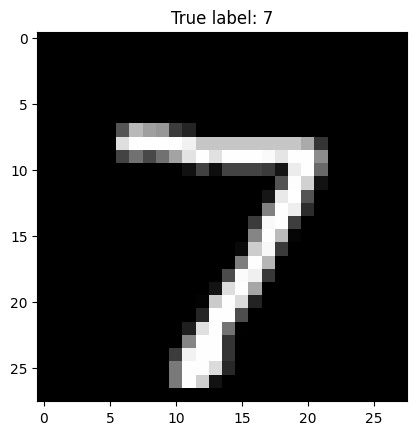

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load and Preprocess Data
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Build the Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten the 28x28 images into 1D vectors
    Dense(128, activation='relu'),       # Fully connected layer with 128 units and ReLU activation
    Dense(64, activation='relu'),        # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')      # Output layer with 10 units (one for each digit) and softmax activation
])

# Step 3: Compile the Model
model.compile(optimizer='adam',          # Adam optimizer
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])      # Metric to evaluate during training

# Step 4: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Train the model for 10 epochs

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Predicting on test data
predictions = model.predict(X_test)

# Displaying the first prediction and the corresponding label
import numpy as np
import matplotlib.pyplot as plt

print("First prediction:", np.argmax(predictions[0]))
plt.imshow(X_test[0], cmap='gray')
plt.title(f"True label: {np.argmax(y_test[0])}")
plt.show()
